In [ ]:
! git clone https://github.com/jennyschilling/project_gss_group11/

Cloning into 'project_gss_group11'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 29 (delta 9), reused 6 (delta 6), pack-reused 18
Receiving objects: 100% (29/29), 24.14 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (9/9), done.


      adoptus          immfate                   letin1a      letinhsp1  \
71012     3.0  become citizens          reduced a little      decreased   
71030     3.0  become citizens          reduced a little  left the same   
71028     3.0  become citizens          reduced a little  left the same   
71025     3.0  become citizens  remain the same as it is  left the same   
71022     3.0  become citizens        increased a little      increased   

           letinasn1   age     sex   race born  
71012  left the same  83.0    male  white  yes  
71030  left the same  33.0  female  white  yes  
71028  left the same  30.0    male  white  yes  
71025  left the same  20.0  female  white  yes  
71022      increased  21.0  female  white  yes  


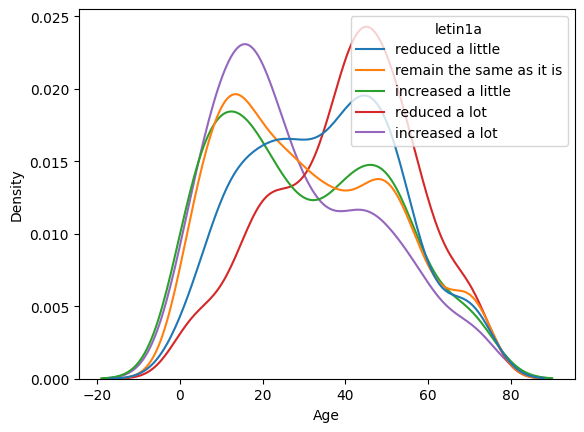

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./project_gss_group11/selected_gss_data.csv', low_memory=False)

# sort the data by adoptus, non-numerical values will go to top which we will remove
df = df.sort_values(by=['adoptus'], ascending=False)

# remove the extra two header rows created from our loop in get_gss.ipynb
df = df.iloc[2:]

# doesn't impact results at all
df = df.drop('parborn', axis = 1)

# drop rows w missing values in crucial columns
df = df.dropna(subset=['adoptus', 'immfate', 'letin1a', 'letinhsp1', 'letinasn1'])
print(df.head())

# convert age column to numerical data type
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])

# remove "don't know" categories from adoptus
df = df[~df['adoptus'].isin(['D', 'N', 'I', 'S'])]

# grouped kernel density plot,
#   common_norm allows us to normalize independently for each group
sns.kdeplot(data=df,x='age',hue='letin1a',common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()